In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# macOS용 한글 폰트 설정

# macOS에서 사용 가능한 한글 폰트들
macos_korean_fonts = [
    '/System/Library/Fonts/AppleGothic.ttf',
    '/System/Library/Fonts/AppleSDGothicNeo.ttc',
    '/Library/Fonts/NanumGothic.ttf',
    '/Library/Fonts/NanumBarunGothic.ttf',
    '/System/Library/Fonts/PingFang.ttc'
]

# 사용 가능한 폰트 찾기
available_font = None
for font_path in macos_korean_fonts:
    if os.path.exists(font_path):
        available_font = font_path
        print(f"사용 가능한 폰트 발견: {font_path}")
        break

if available_font:
    # 폰트 설정
    font_prop = fm.FontProperties(fname=available_font)
    plt.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['axes.unicode_minus'] = False
    print(f"폰트 설정 완료: {font_prop.get_name()}")
else:
    # 기본 폰트로 설정
    plt.rcParams['font.family'] = 'AppleGothic'
    plt.rcParams['axes.unicode_minus'] = False
    print("기본 AppleGothic 폰트 사용")

사용 가능한 폰트 발견: /System/Library/Fonts/AppleSDGothicNeo.ttc
폰트 설정 완료: Apple SD Gothic Neo


In [3]:
# 데이터 로드
retail_stores_df = pd.read_csv('../01_data_analysis/데이터_전처리후/9_가맹점수현황/지역별_도소매별_가맹점수_현황.csv')
service_stores_df = pd.read_csv('../01_data_analysis/데이터_전처리후/9_가맹점수현황/지역별_서비스별_가맹점수_현황.csv')
food_stores_df = pd.read_csv('../01_data_analysis/데이터_전처리후/9_가맹점수현황/지역별_외식별_가맹점수_현황.csv')

print("=== 데이터 로드 완료 ===")
print(f"도소매 가맹점 데이터: {retail_stores_df.shape}")
print(f"서비스 가맹점 데이터: {service_stores_df.shape}")
print(f"외식 가맹점 데이터: {food_stores_df.shape}")
print()

# 데이터 미리보기
print("=== 도소매 가맹점 데이터 미리보기 ===")
print(retail_stores_df.head())
print("\n=== 서비스 가맹점 데이터 미리보기 ===")
print(service_stores_df.head())
print("\n=== 외식 가맹점 데이터 미리보기 ===")
print(food_stores_df.head())
print()


=== 데이터 로드 완료 ===
도소매 가맹점 데이터: (40, 6)
서비스 가맹점 데이터: (40, 6)
외식 가맹점 데이터: (40, 6)

=== 도소매 가맹점 데이터 미리보기 ===
     yr indutyLclasNm indutyMlsfcNm  allFrcsCnt  frcsCnt   rate
0  2017           도소매           편의점       48324    35222  72.89
1  2017           도소매         기타도소매       48324     5737  11.87
2  2017           도소매           화장품       48324     4101   8.49
3  2017           도소매        (건강)식품       48324     2054   4.25
4  2017           도소매         종합소매점       48324      727   1.50

=== 서비스 가맹점 데이터 미리보기 ===
     yr indutyLclasNm indutyMlsfcNm  allFrcsCnt  frcsCnt   rate
0  2017           서비스      교육 (외국어)       65164    17488  26.84
1  2017           서비스       교육 (교과)       65164    13923  21.37
2  2017           서비스        자동차 관련       65164     6761  10.38
3  2017           서비스         기타 교육       65164     4905   7.53
4  2017           서비스           이미용       65164     3856   5.92

=== 외식 가맹점 데이터 미리보기 ===
     yr indutyLclasNm indutyMlsfcNm  allFrcsCnt  frcsCnt   rate
0  2017    

=== 1. 연도별 총 가맹점수 추이 분석 ===


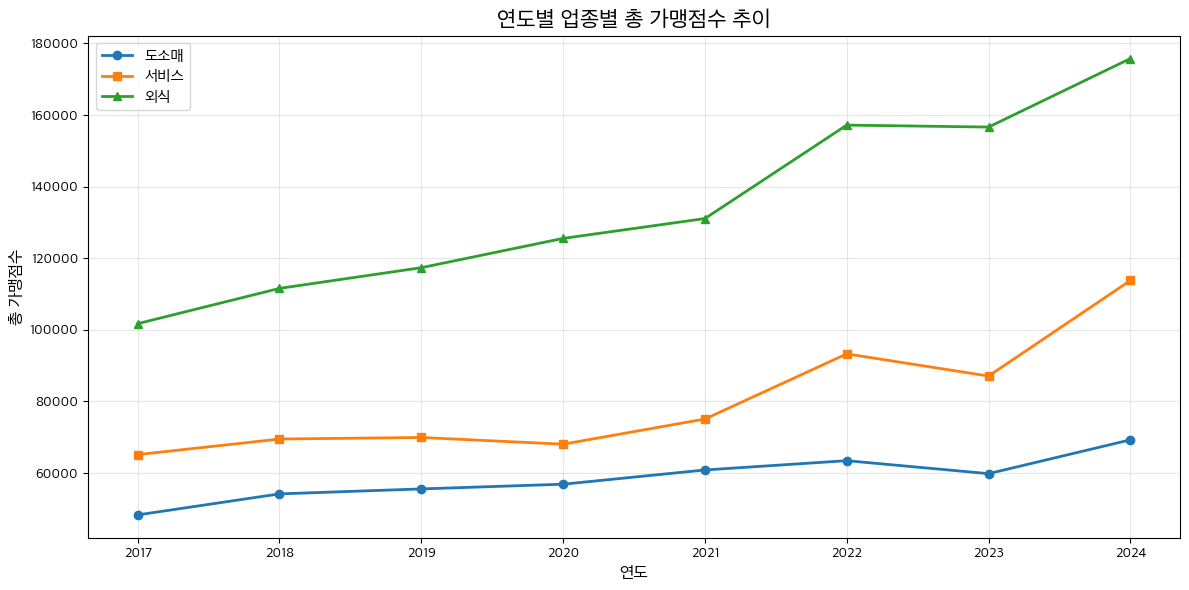

연도별 총 가맹점수:
도소매: {2017: 48324, 2018: 54194, 2019: 55581, 2020: 56897, 2021: 60874, 2022: 63470, 2023: 59843, 2024: 69293}
서비스: {2017: 65164, 2018: 69518, 2019: 69948, 2020: 68071, 2021: 75102, 2022: 93298, 2023: 87107, 2024: 113790}
외식: {2017: 101737, 2018: 111586, 2019: 117368, 2020: 125550, 2021: 131085, 2022: 157192, 2023: 156638, 2024: 175768}



In [4]:
# 1. 연도별 총 가맹점수 추이 분석
def analyze_yearly_total_stores():
    print("=== 1. 연도별 총 가맹점수 추이 분석 ===")
    
    # 연도별 총 가맹점수 계산
    retail_total = retail_stores_df.groupby('yr')['allFrcsCnt'].first()
    service_total = service_stores_df.groupby('yr')['allFrcsCnt'].first()
    food_total = food_stores_df.groupby('yr')['allFrcsCnt'].first()
    
    # 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(retail_total.index, retail_total.values, marker='o', label='도소매', linewidth=2)
    plt.plot(service_total.index, service_total.values, marker='s', label='서비스', linewidth=2)
    plt.plot(food_total.index, food_total.values, marker='^', label='외식', linewidth=2)
    
    plt.title('연도별 업종별 총 가맹점수 추이', fontsize=16, fontweight='bold')
    plt.xlabel('연도', fontsize=12)
    plt.ylabel('총 가맹점수', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 통계 출력
    print("연도별 총 가맹점수:")
    print("도소매:", retail_total.to_dict())
    print("서비스:", service_total.to_dict())
    print("외식:", food_total.to_dict())
    print()

analyze_yearly_total_stores()

=== 2. 2024년 업종별 가맹점수 분석 ===


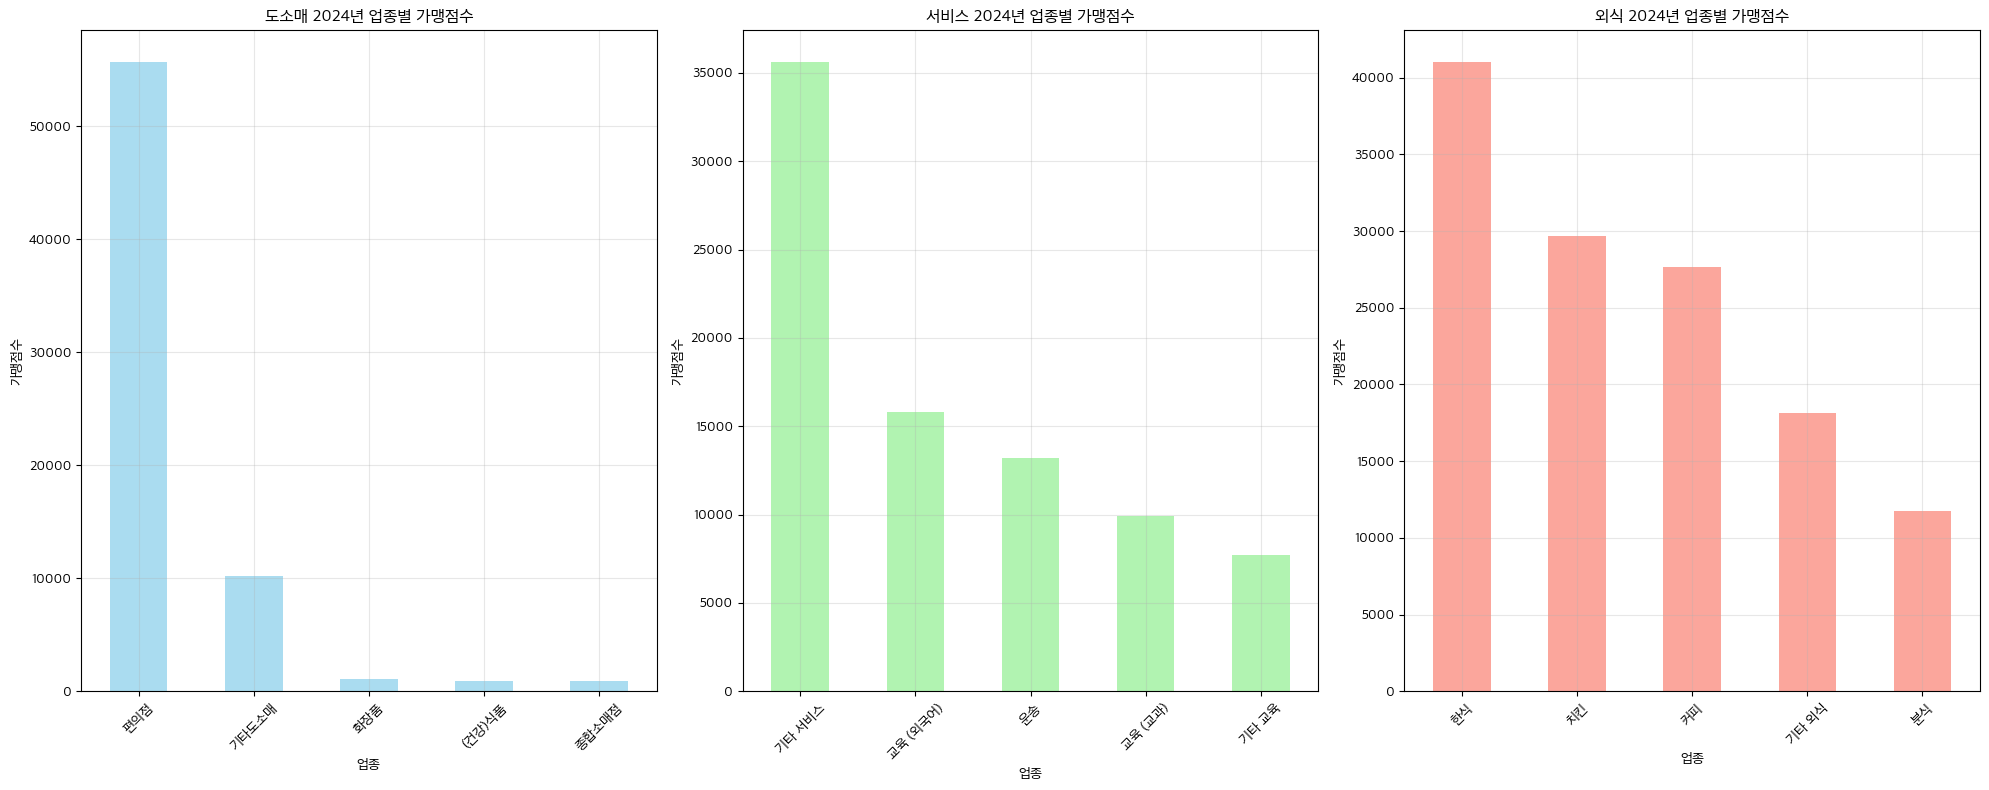

2024년 업종별 가맹점수:
도소매: {'편의점': 55710, '기타도소매': 10203, '화장품': 1071, '(건강)식품': 943, '종합소매점': 886}
서비스: {'기타 서비스': 35622, '교육 (외국어)': 15819, '운송': 13214, '교육 (교과)': 9918, '기타 교육': 7730}
외식: {'한식': 41032, '치킨': 29681, '커피': 27642, '기타 외식': 18132, '분식': 11731}



In [5]:
# 2. 2024년 업종별 가맹점수 분석
def analyze_2024_industry_stores():
    print("=== 2. 2024년 업종별 가맹점수 분석 ===")
    
    # 2024년 데이터만 필터링
    retail_2024 = retail_stores_df[retail_stores_df['yr'] == 2024]
    service_2024 = service_stores_df[service_stores_df['yr'] == 2024]
    food_2024 = food_stores_df[food_stores_df['yr'] == 2024]
    
    # 업종별 가맹점수 계산
    retail_industry = retail_2024.groupby('indutyMlsfcNm')['frcsCnt'].sum().sort_values(ascending=False)
    service_industry = service_2024.groupby('indutyMlsfcNm')['frcsCnt'].sum().sort_values(ascending=False)
    food_industry = food_2024.groupby('indutyMlsfcNm')['frcsCnt'].sum().sort_values(ascending=False)
    
    # 시각화
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    
    # 도소매
    retail_industry.plot(kind='bar', ax=axes[0], color='skyblue', alpha=0.7)
    axes[0].set_title('도소매 2024년 업종별 가맹점수', fontweight='bold')
    axes[0].set_xlabel('업종')
    axes[0].set_ylabel('가맹점수')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)
    
    # 서비스
    service_industry.plot(kind='bar', ax=axes[1], color='lightgreen', alpha=0.7)
    axes[1].set_title('서비스 2024년 업종별 가맹점수', fontweight='bold')
    axes[1].set_xlabel('업종')
    axes[1].set_ylabel('가맹점수')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3)
    
    # 외식
    food_industry.plot(kind='bar', ax=axes[2], color='salmon', alpha=0.7)
    axes[2].set_title('외식 2024년 업종별 가맹점수', fontweight='bold')
    axes[2].set_xlabel('업종')
    axes[2].set_ylabel('가맹점수')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("2024년 업종별 가맹점수:")
    print("도소매:", retail_industry.to_dict())
    print("서비스:", service_industry.to_dict())
    print("외식:", food_industry.to_dict())
    print()

analyze_2024_industry_stores()

=== 3. 업종별 가맹점수 비교 분석 ===


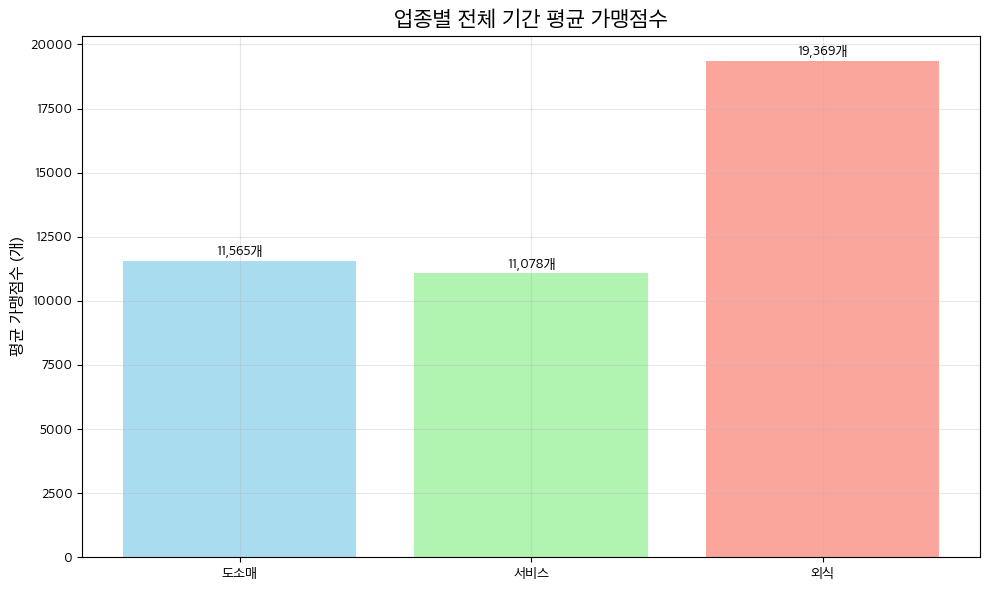

업종별 전체 기간 평균 가맹점수:
도소매: 11,565개
서비스: 11,078개
외식: 19,369개



In [6]:
# 3. 업종별 가맹점수 비교 분석
def analyze_industry_comparison():
    print("=== 3. 업종별 가맹점수 비교 분석 ===")
    
    # 전체 기간 평균 가맹점수
    retail_avg = retail_stores_df['frcsCnt'].mean()
    service_avg = service_stores_df['frcsCnt'].mean()
    food_avg = food_stores_df['frcsCnt'].mean()
    
    # 시각화
    industries = ['도소매', '서비스', '외식']
    averages = [retail_avg, service_avg, food_avg]
    colors = ['skyblue', 'lightgreen', 'salmon']
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(industries, averages, color=colors, alpha=0.7)
    
    # 값 표시
    for bar, avg in zip(bars, averages):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
                f'{avg:,.0f}개', ha='center', va='bottom', fontweight='bold')
    
    plt.title('업종별 전체 기간 평균 가맹점수', fontsize=16, fontweight='bold')
    plt.ylabel('평균 가맹점수 (개)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("업종별 전체 기간 평균 가맹점수:")
    print(f"도소매: {retail_avg:,.0f}개")
    print(f"서비스: {service_avg:,.0f}개")
    print(f"외식: {food_avg:,.0f}개")
    print()

analyze_industry_comparison()

=== 4. 연도별 업종별 가맹점수 성장률 분석 ===


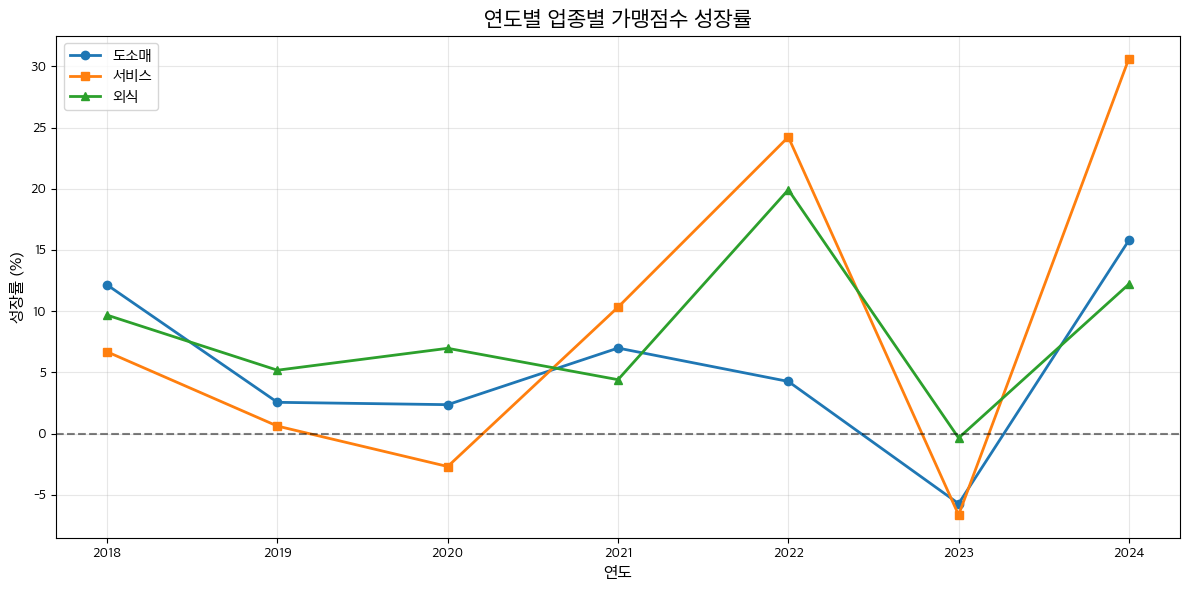

연도별 가맹점수 성장률 (%):
도소매: {2017: nan, 2018: 12.147173247247744, 2019: 2.559323910395994, 2020: 2.3677155862614985, 2021: 6.989823716540422, 2022: 4.264546440187922, 2023: -5.714510792500393, 2024: 15.791320622295002}
서비스: {2017: nan, 2018: 6.681603339267084, 2019: 0.6185448373083213, 2020: -2.6834219706067364, 2021: 10.328921273376324, 2022: 24.228382732816712, 2023: -6.635726382130381, 2024: 30.632440561608142}
외식: {2017: nan, 2018: 9.68084374416387, 2019: 5.181653612460346, 2020: 6.971235771249407, 2021: 4.408602150537644, 2022: 19.916084983026284, 2023: -0.35243523843452307, 2024: 12.212872993781843}



In [7]:
# 4. 연도별 업종별 성장률 분석
def analyze_growth_rates():
    print("=== 4. 연도별 업종별 가맹점수 성장률 분석 ===")
    
    # 연도별 총 가맹점수
    retail_yearly = retail_stores_df.groupby('yr')['allFrcsCnt'].first()
    service_yearly = service_stores_df.groupby('yr')['allFrcsCnt'].first()
    food_yearly = food_stores_df.groupby('yr')['allFrcsCnt'].first()
    
    # 성장률 계산 (전년 대비)
    retail_growth = retail_yearly.pct_change() * 100
    service_growth = service_yearly.pct_change() * 100
    food_growth = food_yearly.pct_change() * 100
    
    # 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(retail_growth.index[1:], retail_growth.values[1:], marker='o', label='도소매', linewidth=2)
    plt.plot(service_growth.index[1:], service_growth.values[1:], marker='s', label='서비스', linewidth=2)
    plt.plot(food_growth.index[1:], food_growth.values[1:], marker='^', label='외식', linewidth=2)
    
    plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    plt.title('연도별 업종별 가맹점수 성장률', fontsize=16, fontweight='bold')
    plt.xlabel('연도', fontsize=12)
    plt.ylabel('성장률 (%)', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("연도별 가맹점수 성장률 (%):")
    print("도소매:", retail_growth.to_dict())
    print("서비스:", service_growth.to_dict())
    print("외식:", food_growth.to_dict())
    print()

analyze_growth_rates()

=== 5. 연도별 업종별 가맹점수 히트맵 ===


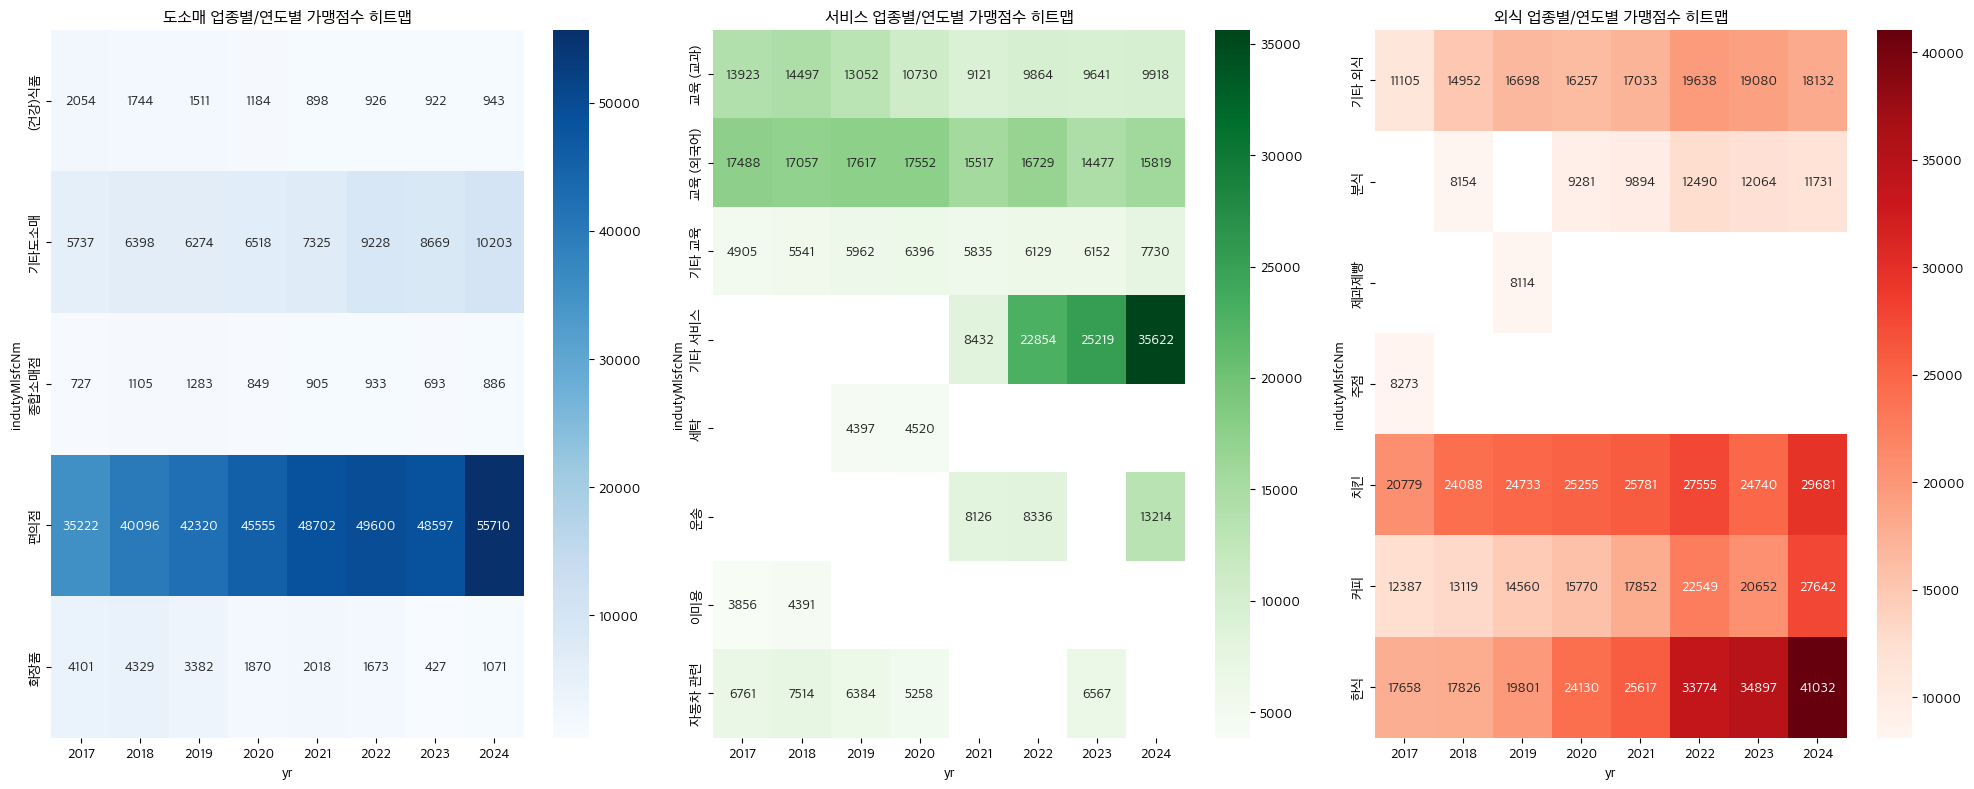

히트맵 데이터:
도소매 피벗 테이블:
yr              2017   2018   2019   2020   2021   2022   2023   2024
indutyMlsfcNm                                                        
(건강)식품          2054   1744   1511   1184    898    926    922    943
기타도소매           5737   6398   6274   6518   7325   9228   8669  10203
종합소매점            727   1105   1283    849    905    933    693    886
편의점            35222  40096  42320  45555  48702  49600  48597  55710
화장품             4101   4329   3382   1870   2018   1673    427   1071

서비스 피벗 테이블:
yr                2017     2018     2019     2020     2021     2022     2023  \
indutyMlsfcNm                                                                  
교육 (교과)        13923.0  14497.0  13052.0  10730.0   9121.0   9864.0   9641.0   
교육 (외국어)       17488.0  17057.0  17617.0  17552.0  15517.0  16729.0  14477.0   
기타 교육           4905.0   5541.0   5962.0   6396.0   5835.0   6129.0   6152.0   
기타 서비스             NaN      NaN      NaN      NaN   8432.0  22854.0  25219.0

In [8]:
# 5. 연도별 업종별 히트맵
def create_yearly_heatmap():
    print("=== 5. 연도별 업종별 가맹점수 히트맵 ===")
    
    # 피벗 테이블 생성
    retail_pivot = retail_stores_df.pivot_table(values='frcsCnt', index='indutyMlsfcNm', columns='yr', aggfunc='sum')
    service_pivot = service_stores_df.pivot_table(values='frcsCnt', index='indutyMlsfcNm', columns='yr', aggfunc='sum')
    food_pivot = food_stores_df.pivot_table(values='frcsCnt', index='indutyMlsfcNm', columns='yr', aggfunc='sum')
    
    # 시각화
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    
    sns.heatmap(retail_pivot, annot=True, fmt='.0f', cmap='Blues', ax=axes[0])
    axes[0].set_title('도소매 업종별/연도별 가맹점수 히트맵', fontweight='bold')
    
    sns.heatmap(service_pivot, annot=True, fmt='.0f', cmap='Greens', ax=axes[1])
    axes[1].set_title('서비스 업종별/연도별 가맹점수 히트맵', fontweight='bold')
    
    sns.heatmap(food_pivot, annot=True, fmt='.0f', cmap='Reds', ax=axes[2])
    axes[2].set_title('외식 업종별/연도별 가맹점수 히트맵', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("히트맵 데이터:")
    print("도소매 피벗 테이블:")
    print(retail_pivot)
    print("\n서비스 피벗 테이블:")
    print(service_pivot)
    print("\n외식 피벗 테이블:")
    print(food_pivot)
    print()

create_yearly_heatmap()

=== 6. 상세 통계 분석 ===
도소매 가맹점수 통계:
count       40.000000
mean     11564.700000
std      17698.339688
min        427.000000
25%        940.500000
50%       2036.000000
75%       8808.750000
max      55710.000000
Name: frcsCnt, dtype: float64

서비스 가맹점수 통계:
count       40.000000
mean     11077.575000
std       6688.995969
min       3856.000000
25%       6146.250000
50%       8776.500000
75%      14752.000000
max      35622.000000
Name: frcsCnt, dtype: float64

외식 가맹점수 통계:
count       40.000000
mean     19369.350000
std       7779.638356
min       8114.000000
25%      12961.750000
50%      17992.000000
75%      24734.750000
max      41032.000000
Name: frcsCnt, dtype: float64



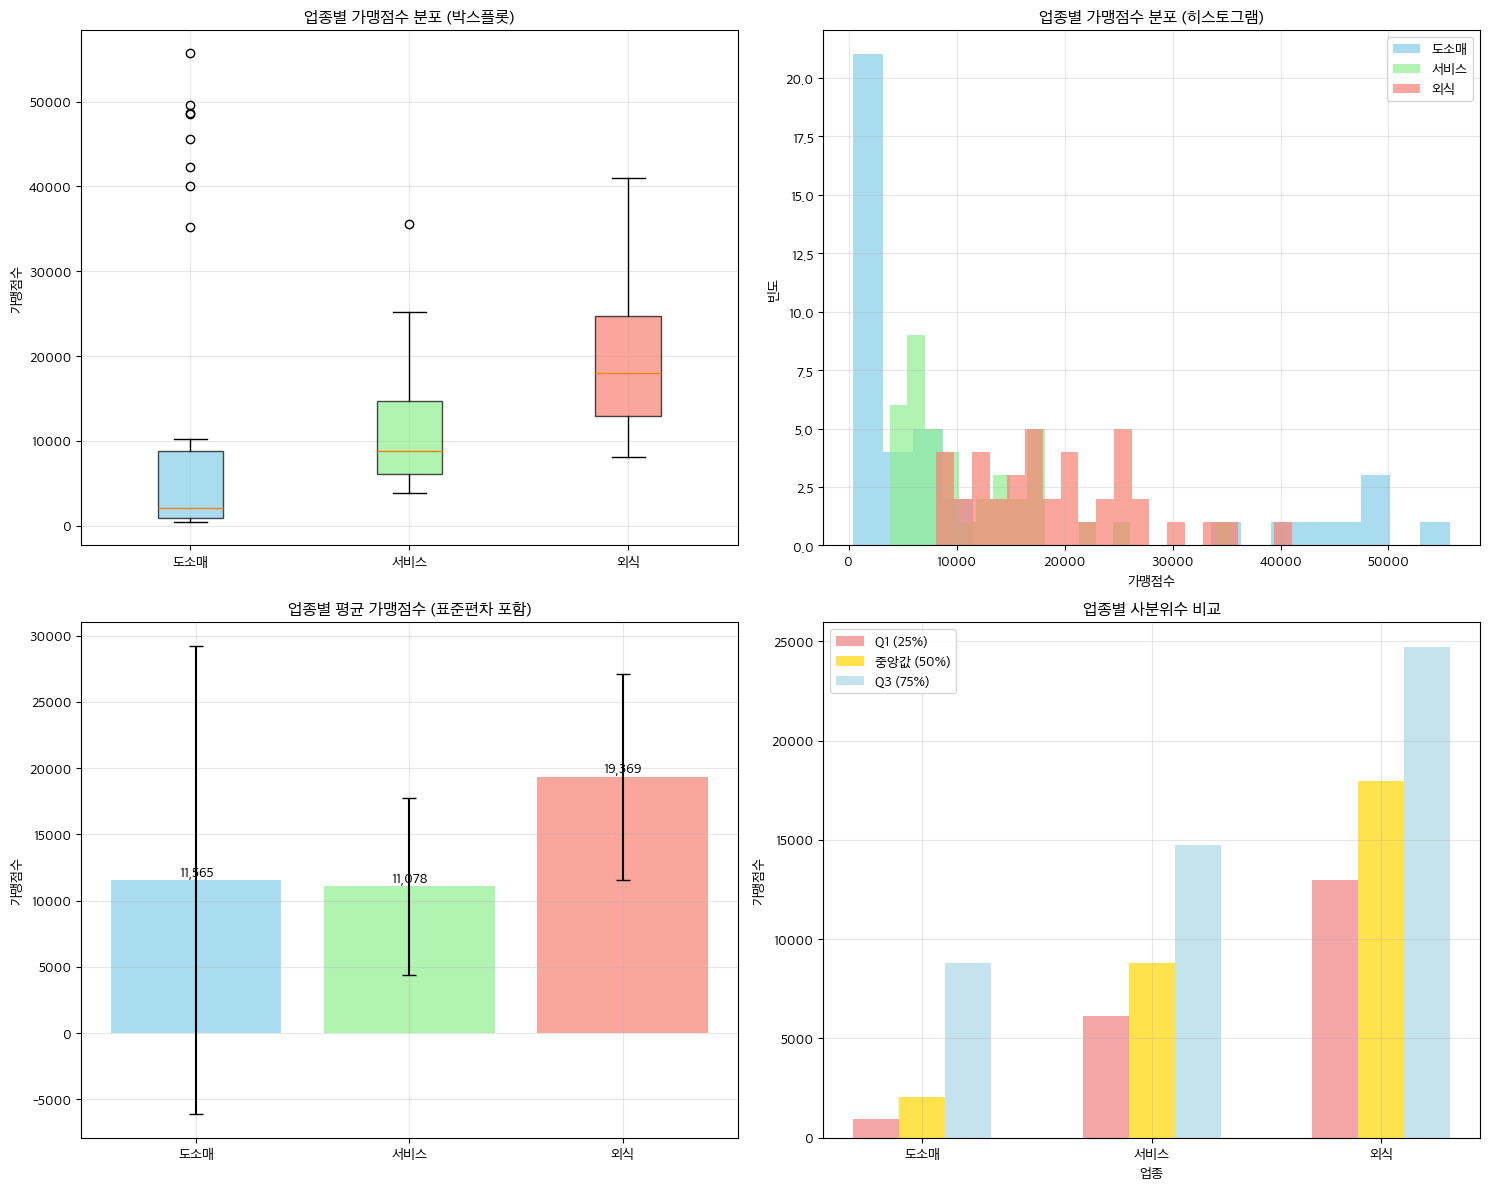

=== 최고/최저 가맹점수 업종 ===
도소매 최고 가맹점수: 2024년 편의점 - 55,710개
도소매 최저 가맹점수: 2023년 화장품 - 427개

서비스 최고 가맹점수: 2024년 기타 서비스 - 35,622개
서비스 최저 가맹점수: 2017년 이미용 - 3,856개

외식 최고 가맹점수: 2024년 한식 - 41,032개
외식 최저 가맹점수: 2019년 제과제빵 - 8,114개



In [9]:
# 6. 상세 통계 분석 (시각화 포함)
def detailed_statistics():
    print("=== 6. 상세 통계 분석 ===")
    
    # 각 업종별 통계
    retail_stats = retail_stores_df['frcsCnt'].describe()
    service_stats = service_stores_df['frcsCnt'].describe()
    food_stats = food_stores_df['frcsCnt'].describe()
    
    print("도소매 가맹점수 통계:")
    print(retail_stats)
    print("\n서비스 가맹점수 통계:")
    print(service_stats)
    print("\n외식 가맹점수 통계:")
    print(food_stats)
    print()
    
    # 통계 시각화
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. 박스플롯
    data = [retail_stores_df['frcsCnt'], service_stores_df['frcsCnt'], food_stores_df['frcsCnt']]
    labels = ['도소매', '서비스', '외식']
    colors = ['skyblue', 'lightgreen', 'salmon']
    
    bp = axes[0,0].boxplot(data, labels=labels, patch_artist=True)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    axes[0,0].set_title('업종별 가맹점수 분포 (박스플롯)', fontweight='bold')
    axes[0,0].set_ylabel('가맹점수')
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. 히스토그램
    axes[0,1].hist(retail_stores_df['frcsCnt'], bins=20, alpha=0.7, label='도소매', color='skyblue')
    axes[0,1].hist(service_stores_df['frcsCnt'], bins=20, alpha=0.7, label='서비스', color='lightgreen')
    axes[0,1].hist(food_stores_df['frcsCnt'], bins=20, alpha=0.7, label='외식', color='salmon')
    axes[0,1].set_title('업종별 가맹점수 분포 (히스토그램)', fontweight='bold')
    axes[0,1].set_xlabel('가맹점수')
    axes[0,1].set_ylabel('빈도')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. 평균 비교 막대그래프
    means = [retail_stats['mean'], service_stats['mean'], food_stats['mean']]
    stds = [retail_stats['std'], service_stats['std'], food_stats['std']]
    
    bars = axes[1,0].bar(labels, means, yerr=stds, capsize=5, color=colors, alpha=0.7)
    axes[1,0].set_title('업종별 평균 가맹점수 (표준편차 포함)', fontweight='bold')
    axes[1,0].set_ylabel('가맹점수')
    axes[1,0].grid(True, alpha=0.3)
    
    # 값 표시
    for bar, mean in zip(bars, means):
        axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
                      f'{mean:,.0f}', ha='center', va='bottom', fontweight='bold')
    
    # 4. 중앙값과 사분위수 비교
    medians = [retail_stats['50%'], service_stats['50%'], food_stats['50%']]
    q1 = [retail_stats['25%'], service_stats['25%'], food_stats['25%']]
    q3 = [retail_stats['75%'], service_stats['75%'], food_stats['75%']]
    
    x_pos = np.arange(len(labels))
    axes[1,1].bar(x_pos - 0.2, q1, width=0.2, label='Q1 (25%)', color='lightcoral', alpha=0.7)
    axes[1,1].bar(x_pos, medians, width=0.2, label='중앙값 (50%)', color='gold', alpha=0.7)
    axes[1,1].bar(x_pos + 0.2, q3, width=0.2, label='Q3 (75%)', color='lightblue', alpha=0.7)
    
    axes[1,1].set_title('업종별 사분위수 비교', fontweight='bold')
    axes[1,1].set_xlabel('업종')
    axes[1,1].set_ylabel('가맹점수')
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(labels)
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 최고/최저 가맹점수 업종
    print("=== 최고/최저 가맹점수 업종 ===")
    for df, name in [(retail_stores_df, '도소매'), (service_stores_df, '서비스'), (food_stores_df, '외식')]:
        max_idx = df['frcsCnt'].idxmax()
        min_idx = df['frcsCnt'].idxmin()
        
        print(f"{name} 최고 가맹점수: {df.loc[max_idx, 'yr']}년 {df.loc[max_idx, 'indutyMlsfcNm']} - {df.loc[max_idx, 'frcsCnt']:,.0f}개")
        print(f"{name} 최저 가맹점수: {df.loc[min_idx, 'yr']}년 {df.loc[min_idx, 'indutyMlsfcNm']} - {df.loc[min_idx, 'frcsCnt']:,.0f}개")
        print()

detailed_statistics()

=== 7. 점유율 분석 ===


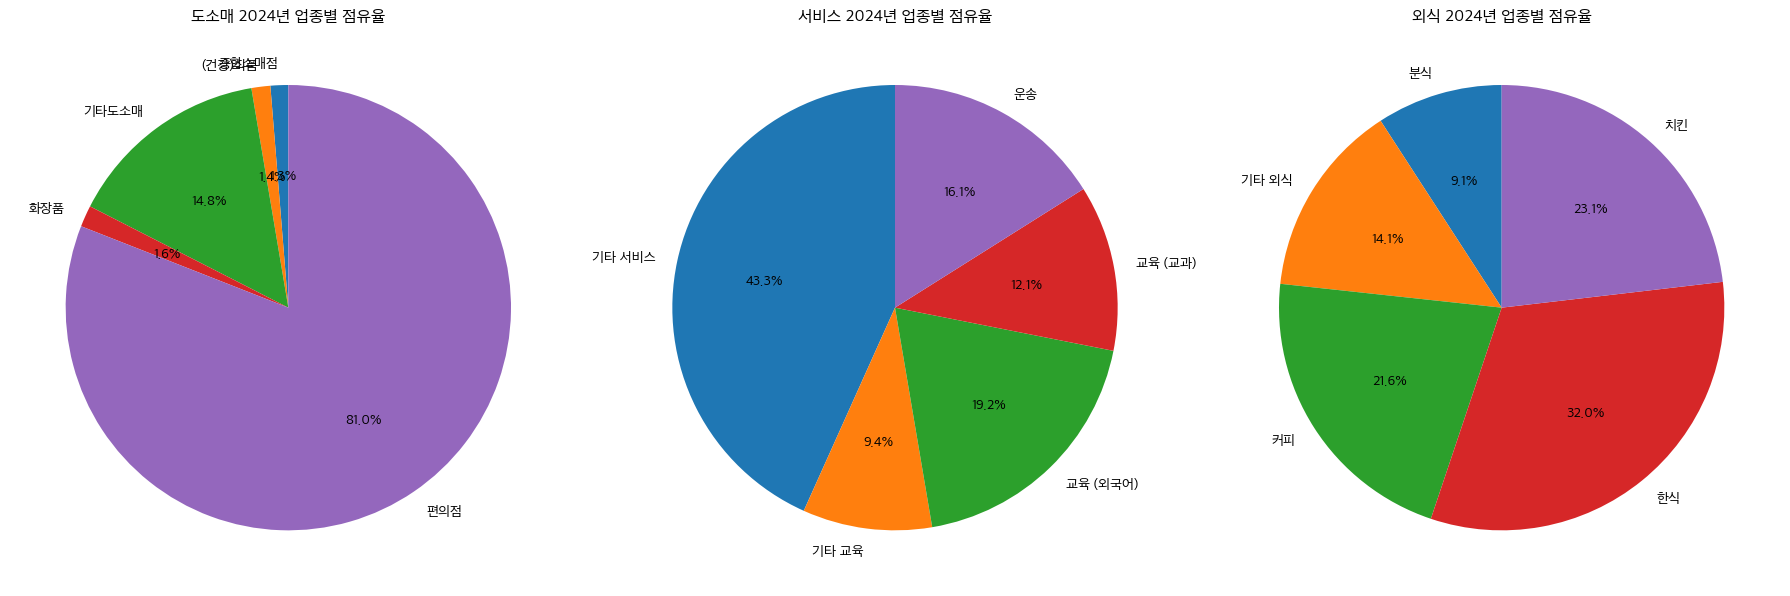

2024년 업종별 점유율:
도소매:
  종합소매점: 1.28%
  (건강)식품: 1.36%
  기타도소매: 14.72%
  화장품: 1.55%
  편의점: 80.40%

서비스:
  기타 서비스: 31.31%
  기타 교육: 6.79%
  교육 (외국어): 13.90%
  교육 (교과): 8.72%
  운송: 11.61%

외식:
  분식: 6.67%
  기타 외식: 10.32%
  커피: 15.73%
  한식: 23.34%
  치킨: 16.89%



In [10]:
# 7. 점유율 분석
def analyze_market_share():
    print("=== 7. 점유율 분석 ===")
    
    # 2024년 점유율 분석
    retail_2024 = retail_stores_df[retail_stores_df['yr'] == 2024]
    service_2024 = service_stores_df[service_stores_df['yr'] == 2024]
    food_2024 = food_stores_df[food_stores_df['yr'] == 2024]
    
    # 시각화
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # 도소매 점유율
    axes[0].pie(retail_2024['frcsCnt'], labels=retail_2024['indutyMlsfcNm'], autopct='%1.1f%%', startangle=90)
    axes[0].set_title('도소매 2024년 업종별 점유율', fontweight='bold')
    
    # 서비스 점유율
    axes[1].pie(service_2024['frcsCnt'], labels=service_2024['indutyMlsfcNm'], autopct='%1.1f%%', startangle=90)
    axes[1].set_title('서비스 2024년 업종별 점유율', fontweight='bold')
    
    # 외식 점유율
    axes[2].pie(food_2024['frcsCnt'], labels=food_2024['indutyMlsfcNm'], autopct='%1.1f%%', startangle=90)
    axes[2].set_title('외식 2024년 업종별 점유율', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("2024년 업종별 점유율:")
    print("도소매:")
    for _, row in retail_2024.iterrows():
        print(f"  {row['indutyMlsfcNm']}: {row['rate']:.2f}%")
    print("\n서비스:")
    for _, row in service_2024.iterrows():
        print(f"  {row['indutyMlsfcNm']}: {row['rate']:.2f}%")
    print("\n외식:")
    for _, row in food_2024.iterrows():
        print(f"  {row['indutyMlsfcNm']}: {row['rate']:.2f}%")
    print()

analyze_market_share()

=== 8. 연도별 점유율 변화 분석 ===


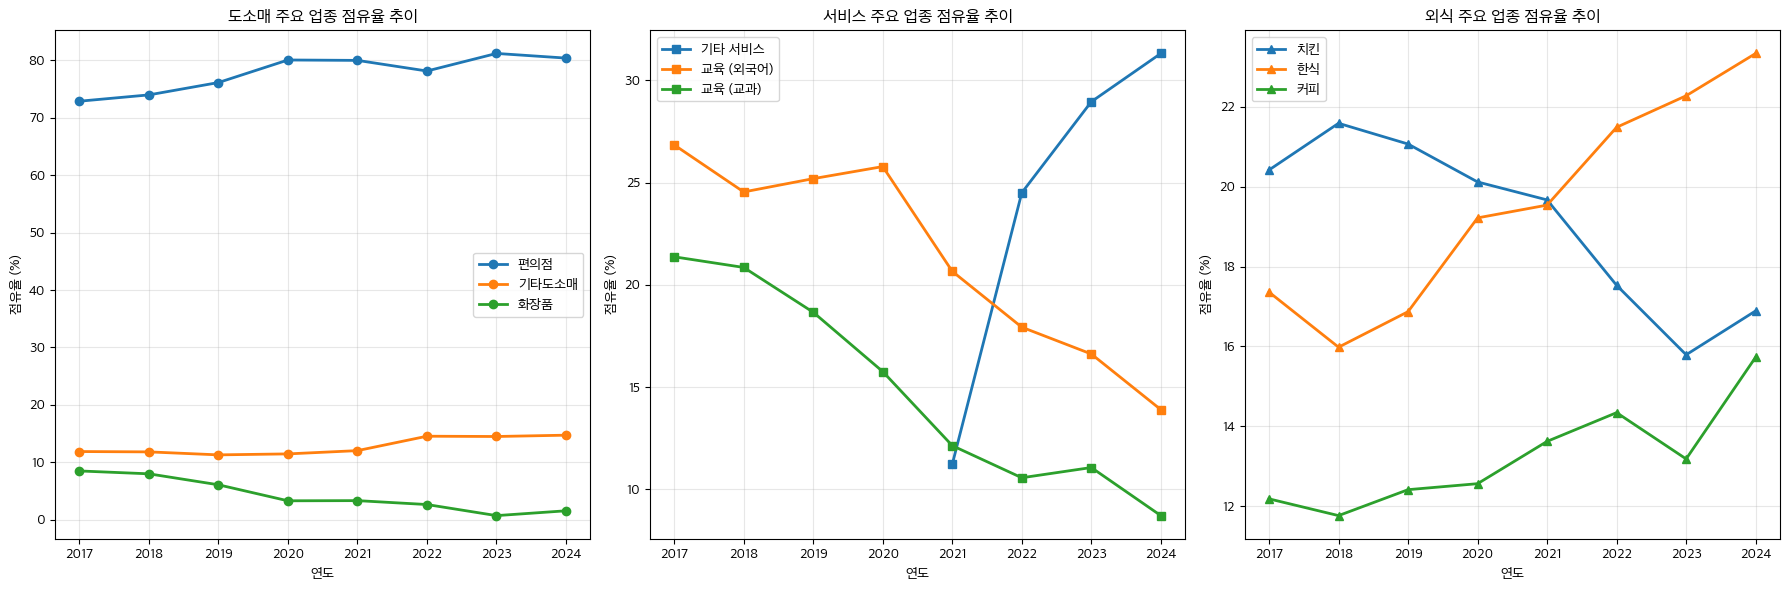

주요 업종별 점유율 변화 분석 완료



In [12]:
# 8. 연도별 점유율 변화 분석
def analyze_market_share_trends():
    print("=== 8. 연도별 점유율 변화 분석 ===")
    
    # 주요 업종들의 연도별 점유율 추이
    major_retail = ['편의점', '기타도소매', '화장품']
    major_service = ['기타 서비스', '교육 (외국어)', '교육 (교과)']
    major_food = ['치킨', '한식', '커피']
    
    # 시각화
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # 도소매 주요 업종 점유율 추이
    for industry in major_retail:
        data = retail_stores_df[retail_stores_df['indutyMlsfcNm'] == industry]
        axes[0].plot(data['yr'], data['rate'], marker='o', label=industry, linewidth=2)
    axes[0].set_title('도소매 주요 업종 점유율 추이', fontweight='bold')
    axes[0].set_xlabel('연도')
    axes[0].set_ylabel('점유율 (%)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # 서비스 주요 업종 점유율 추이
    for industry in major_service:
        data = service_stores_df[service_stores_df['indutyMlsfcNm'] == industry]
        axes[1].plot(data['yr'], data['rate'], marker='s', label=industry, linewidth=2)
    axes[1].set_title('서비스 주요 업종 점유율 추이', fontweight='bold')
    axes[1].set_xlabel('연도')
    axes[1].set_ylabel('점유율 (%)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # 외식 주요 업종 점유율 추이
    for industry in major_food:
        data = food_stores_df[food_stores_df['indutyMlsfcNm'] == industry]
        axes[2].plot(data['yr'], data['rate'], marker='^', label=industry, linewidth=2)
    axes[2].set_title('외식 주요 업종 점유율 추이', fontweight='bold')
    axes[2].set_xlabel('연도')
    axes[2].set_ylabel('점유율 (%)')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("주요 업종별 점유율 변화 분석 완료")
    print()

analyze_market_share_trends()

In [13]:
print("=== 가맹점수현황 분석 완료 ===")

print("연도별 총 가맹점수 추이: 각 업종별로 연도에 따른 총 가맹점수 변화")
print("2024년 업종별 가맹점수: 2024년의 업종별 가맹점수 현황")
print("업종별 가맹점수 비교: 전체 기간 동안의 업종별 평균 가맹점수 비교")
print("성장률 분석: 연도별 가맹점수 성장률 계산")
print("연도별/업종별 히트맵: 가맹점수 변화를 히트맵으로 시각화")
print("상세 통계: 박스플롯, 히스토그램, 평균 비교 등 다양한 통계 시각화")
print("점유율 분석: 2024년 업종별 점유율을 파이차트로 분석")
print("점유율 변화 추이: 주요 업종들의 연도별 점유율 변화 분석")

=== 가맹점수현황 분석 완료 ===
연도별 총 가맹점수 추이: 각 업종별로 연도에 따른 총 가맹점수 변화
2024년 업종별 가맹점수: 2024년의 업종별 가맹점수 현황
업종별 가맹점수 비교: 전체 기간 동안의 업종별 평균 가맹점수 비교
성장률 분석: 연도별 가맹점수 성장률 계산
연도별/업종별 히트맵: 가맹점수 변화를 히트맵으로 시각화
상세 통계: 박스플롯, 히스토그램, 평균 비교 등 다양한 통계 시각화
점유율 분석: 2024년 업종별 점유율을 파이차트로 분석
점유율 변화 추이: 주요 업종들의 연도별 점유율 변화 분석
